In [ ]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"There are {torch.cuda.device_count()} GPU(s) available.")
    print(f"GPU device name: {torch.cuda.get_device_name(0)}")
else:
    print("No CUDA-enabled GPU available.")
    device = torch.device("cpu")
    print("Using CPU instead.")


No CUDA-enabled GPU available.
Using CPU instead.


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
devbatrax_fracture_detection_using_x_ray_images_path = kagglehub.dataset_download('devbatrax/fracture-detection-using-x-ray-images')

print('Data source import complete.')


Data source import complete.


## image show

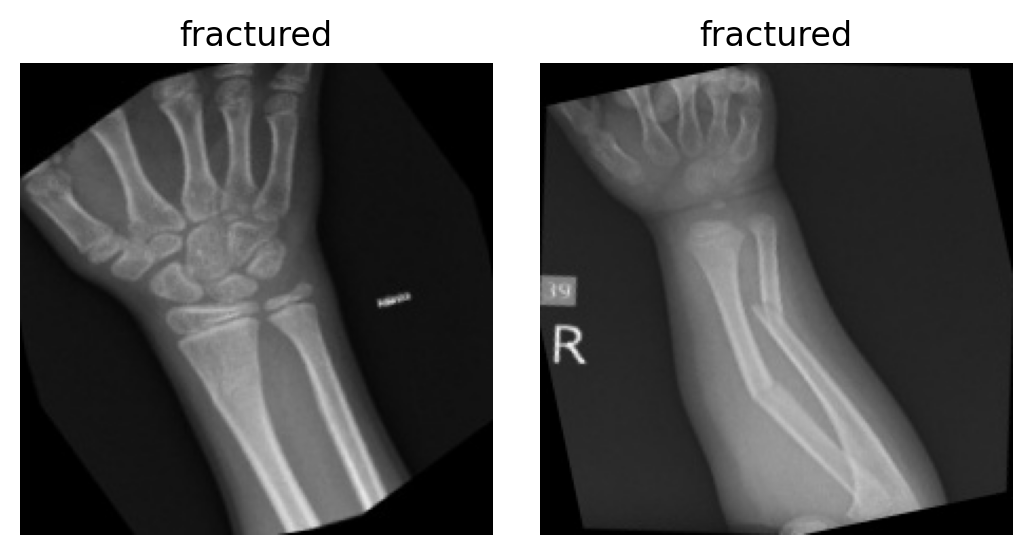

In [ ]:
import matplotlib.pyplot as plt
import os

def show_images(image_dir):
    folder_name = os.path.basename(image_dir)
    # Get the list of image files in the directory
    image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

    # Create a figure with subplots
    fig, axes = plt.subplots(1, 2, dpi=200)

    # Loop through the image files and display them in subplots
    for i, image_file in enumerate(image_files[60:62]):  # Display only the first two images
        image_path = os.path.join(image_dir, image_file)
        image = plt.imread(image_path)
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(str(folder_name))

    # Adjust the spacing between subplots
    plt.subplots_adjust(wspace=0.1)
    # Show the plot
    plt.show()

# Example usage
image_directory = "/kaggle/input/fracture-detection-using-x-ray-images/data/train/fractured"
show_images(image_directory)


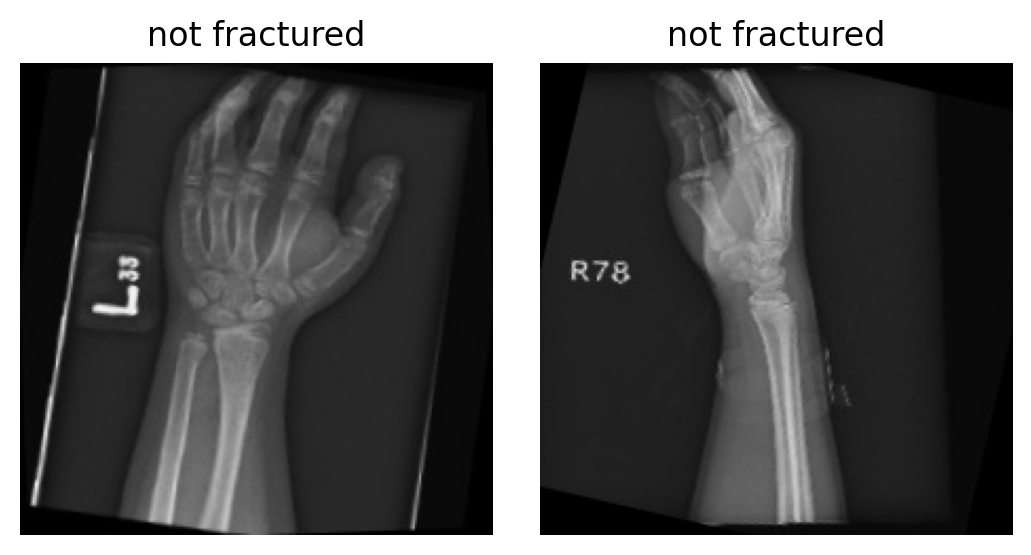

In [ ]:
import matplotlib.pyplot as plt
import os

def show_images(image_dir):
    folder_name = os.path.basename(image_dir)
    # Get the list of image files in the directory
    image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

    # Create a figure with subplots
    fig, axes = plt.subplots(1, 2, dpi=200)

    # Loop through the image files and display them in subplots
    for i, image_file in enumerate(image_files[6:8]):  # Display only the first two images
        image_path = os.path.join(image_dir, image_file)
        image = plt.imread(image_path)
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(str(folder_name))

    # Adjust the spacing between subplots
    plt.subplots_adjust(wspace=0.1)
    # Show the plot
    plt.show()

# Example usage
image_directory = "/kaggle/input/fracture-detection-using-x-ray-images/data/train/not fractured"
show_images(image_directory)


# Results

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import numpy as np
import seaborn as sns
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import log_loss,cohen_kappa_score
from imblearn.metrics import geometric_mean_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [ ]:
import os
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical

# Define the path to the dataset folder
dataset_path = "/kaggle/input/fracture-detection-using-x-ray-images/data/train"


# Define the list of label folders in the dataset folder
label_folders = ["fractured", "not fractured"]

# Define the size of the input images
img_height = 224
img_width = 224

# Define an empty list to store the images and their labels
data = []
labels = []

# Loop over the label folders in the dataset folder
for label_folder in label_folders:
    # Define the path to the label folder
    label_path = os.path.join(dataset_path, label_folder)
    # Loop over the images in the label folder
    for img_name in os.listdir(label_path):
        # Define the path to the image
        img_path = os.path.join(label_path, img_name)
        # Load the image and resize it to the desired size
        img = cv2.imread(img_path)
        img = cv2.resize(img, (img_height, img_width))
        # Append the image and its label to the data and labels lists
        data.append(img)
        labels.append(label_folder)

# Convert the data and labels lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Convert the labels to one-hot encoded vectors
# labels = to_categorical(labels)

# Print the shape of the data and labels arrays
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)

Data shape: (8863, 224, 224, 3)
Labels shape: (8863,)


In [ ]:
import numpy as np


# Get the unique string values
unique_values = np.unique(labels)

# Create a mapping dictionary
mapping = {value: index for index, value in enumerate(unique_values)}

# Map the string values to numbers
mapped_arr = np.array([mapping[value] for value in labels])

print("Original array:", labels)
print("Mapped array:", mapped_arr)
print("Mapping dictionary:", mapping)


Original array: ['fractured' 'fractured' 'fractured' ... 'not fractured' 'not fractured'
 'not fractured']
Mapped array: [0 0 0 ... 1 1 1]
Mapping dictionary: {np.str_('fractured'): 0, np.str_('not fractured'): 1}


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data,mapped_arr, test_size = 0.2,random_state=0,shuffle=True)

# CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
input_shape = (224, 224,3)

model = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.6),
    layers.Flatten(),
    layers.Dense(8, activation = 'relu'),
    layers.Dropout(0.6),
    layers.Dense(1, activation= 'sigmoid'),
])
# model.build(input_shape=input_shape)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','Precision','Recall','AUC'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 788544)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │     6,308,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,310,161 (24.07 MB)

 Trainable params: 6,310,161 (24.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(X_train, Y_train,  epochs=10,validation_split=0.1)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 23s 83ms/step - AUC: 0.5061 - Precision: 0.5005 - Recall: 0.8204 - accuracy: 0.5072 - loss: 19.1368 - val_AUC: 0.5000 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.4951 - val_loss: 0.6932
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - AUC: 0.5015 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.5112 - loss: 0.6931 - val_AUC: 0.5000 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.4951 - val_loss: 0.6932
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - AUC: 0.5000 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.5107 - loss: 0.6930 - val_AUC: 0.5000 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.4951 - val_loss: 0.6933
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - AUC: 0.5000 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.5028 - loss: 0.6932 - val_AUC: 0.5000 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accu

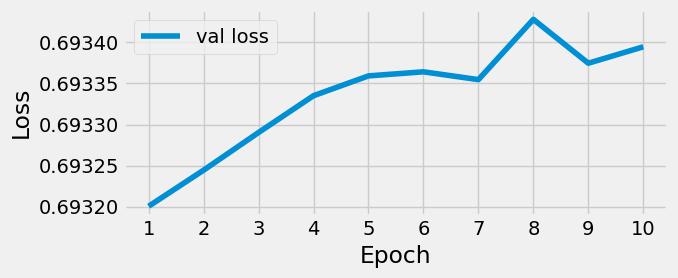

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(7,3), dpi = 100)
# plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xticks(np.arange(10), np.arange(1, 10+1))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# scale_factor = 0.002  # The scaling factor for the y-axis values

# # Get the current y-axis limits
# y_min, y_max = plt.ylim()

# # Scale the limits
# scaled_y_min = y_min * scale_factor
# scaled_y_max = y_max * scale_factor

# # Set the scaled limits
# plt.ylim(scaled_y_min, scaled_y_min+3)
plt.grid(True)
plt.tight_layout()

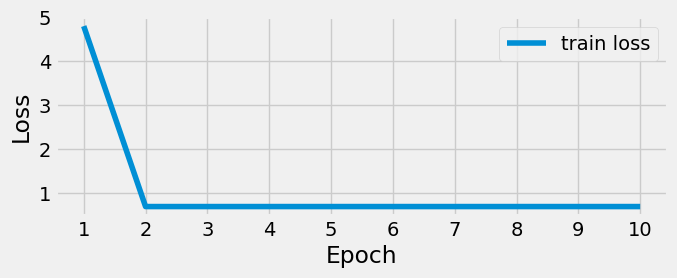

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(7,3), dpi = 100)
plt.plot(history.history['loss'], label='train loss')
# plt.plot(history.history['val_loss'], label='val loss')
plt.xticks(np.arange(10), np.arange(1, 10+1))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# scale_factor = 0.002  # The scaling factor for the y-axis values

# # Get the current y-axis limits
# y_min, y_max = plt.ylim()

# # Scale the limits
# scaled_y_min = y_min * scale_factor
# scaled_y_max = y_max * scale_factor

# # Set the scaled limits
# plt.ylim(scaled_y_min, scaled_y_min+3)
plt.grid(True)
plt.tight_layout()

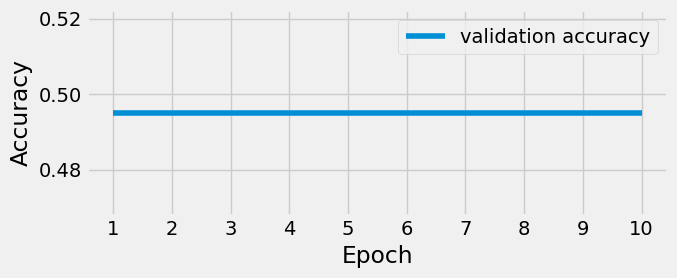

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,3), dpi = 100)
# plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xticks(np.arange(10), np.arange(1, 10+1))
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()

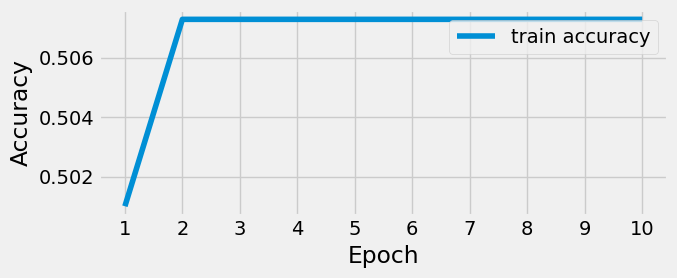

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(7,3), dpi = 100)
plt.plot(history.history['accuracy'], label='train accuracy')
# plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xticks(np.arange(10), np.arange(1, 10+1))
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()

In [ ]:
model.evaluate(X_train, Y_train)

222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - AUC: 0.5000 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.5053 - loss: 0.6931


[0.6930764317512512, 0.5060648918151855, 0.0, 0.0, 0.5]

In [ ]:
model.evaluate(X_test,Y_test)

56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - AUC: 0.5000 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.4970 - loss: 0.6933


[0.6931619048118591, 0.5031020641326904, 0.0, 0.0, 0.5]

In [ ]:
pred= model.predict(X_test)

56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [ ]:
ypred=(pred > 0.5).astype(int)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(Y_test,ypred))
cf_matrix=confusion_matrix(Y_test,ypred)
cf_matrix

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       892
           1       0.00      0.00      0.00       881

    accuracy                           0.50      1773
   macro avg       0.25      0.50      0.33      1773
weighted avg       0.25      0.50      0.34      1773



array([[892,   0],
       [881,   0]])

# Xception

In [ ]:
from tensorflow.keras.applications import MobileNet
vggmodel = MobileNet(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))
for layer in vggmodel.layers[:]:
	layer.trainable = False

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
input_shape = (224, 224,3)

model = models.Sequential([
    vggmodel,
    layers.Dropout(0.6),
    layers.Flatten(),
    layers.Dense(8, activation= 'relu'),
    layers.Dense(1, activation= 'sigmoid'),
])
# model.build(input_shape=input_shape)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, Y_train, epochs=10,validation_split=0.1 )

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - accuracy: 0.5039 - loss: 0.8963 - val_accuracy: 0.4951 - val_loss: 0.6933
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.5137 - loss: 0.6930 - val_accuracy: 0.4951 - val_loss: 0.6933
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.4948 - loss: 0.6933 - val_accuracy: 0.4951 - val_loss: 0.6933
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.5099 - loss: 0.6930 - val_accuracy: 0.4951 - val_loss: 0.6934
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.4998 - loss: 0.6933 - val_accuracy: 0.4951 - val_loss: 0.6934
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.5094 - loss: 0.6930 - val_accuracy: 0.4951 - val_loss: 0.6934
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.5067 - loss: 0.6931 - val_accuracy: 0.4951 - val_loss: 0.6934
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.5098 - loss: 0.6930 - val

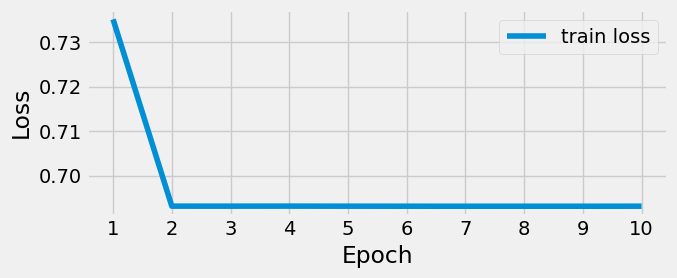

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(7,3), dpi = 100)
plt.plot(history.history['loss'], label='train loss')
# plt.plot(history.history['val_loss'], label='val loss')
plt.xticks(np.arange(10), np.arange(1, 10+1))
plt.xlabel("Epoch")
plt.ylabel("Loss")

# scale_factor = 0.04  # The scaling factor for the y-axis values

# # Get the current y-axis limits
# y_min, y_max = plt.ylim()

# # Scale the limits
# scaled_y_min = y_min * scale_factor
# scaled_y_max = y_max * scale_factor

# # Set the scaled limits
# plt.ylim(scaled_y_min, scaled_y_min+3)

plt.grid(True)

plt.legend()
plt.tight_layout()

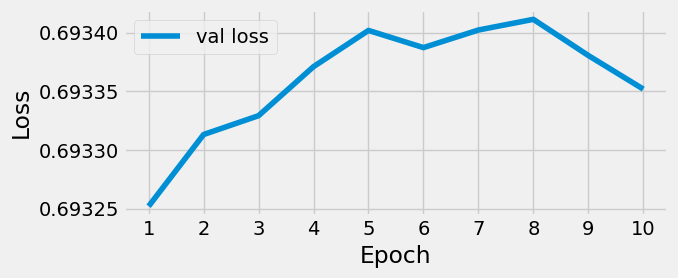

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(7,3), dpi = 100)
# plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xticks(np.arange(10), np.arange(1, 10+1))
plt.xlabel("Epoch")
plt.ylabel("Loss")

# scale_factor = 0.04  # The scaling factor for the y-axis values

# # Get the current y-axis limits
# y_min, y_max = plt.ylim()

# # Scale the limits
# scaled_y_min = y_min * scale_factor
# scaled_y_max = y_max * scale_factor

# # Set the scaled limits
# plt.ylim(scaled_y_min, scaled_y_min+3)

plt.grid(True)

plt.legend()
plt.tight_layout()

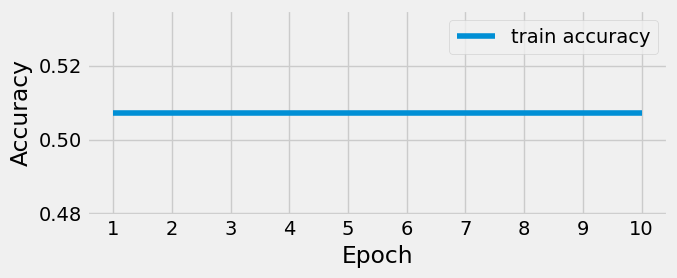

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,3), dpi = 100)
plt.plot(history.history['accuracy'], label='train accuracy')
# plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xticks(np.arange(10), np.arange(1, 10+1))
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.grid(True)

plt.legend()
plt.tight_layout()

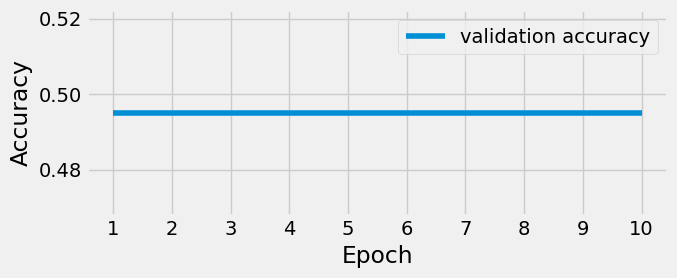

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,3), dpi = 100)
# plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xticks(np.arange(10), np.arange(1, 10+1))
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.grid(True)

plt.legend()
plt.tight_layout()

In [ ]:
model.evaluate(X_test,Y_test)

56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.4970 - loss: 0.6933


[0.693148672580719, 0.5031020641326904]

In [ ]:
pred= model.predict(X_test)
ypred=(pred > 0.5).astype(int)

56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(Y_test,ypred))
cf_matrix=confusion_matrix(Y_test,ypred)
cf_matrix

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       892
           1       0.00      0.00      0.00       881

    accuracy                           0.50      1773
   macro avg       0.25      0.50      0.33      1773
weighted avg       0.25      0.50      0.34      1773



array([[892,   0],
       [881,   0]])

# Novel

In [ ]:
import os
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical

# Define the path to the dataset folder
dataset_path = "/kaggle/input/fracture-detection-using-x-ray-images/data/train"


# Define the list of label folders in the dataset folder
label_folders = ["fractured", "not fractured"]

# Define the size of the input images
img_height = 224
img_width = 224

# Define an empty list to store the images and their labels

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.applications import MobileNet


def create_vgg16_based_model(input_shape, num_classes):
    vggmodel = MobileNet(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))
    for layer in vggmodel.layers[:]:
      layer.trainable = False

    # Create a new model
    model = Sequential()
    # Add the VGG16 base model
    model.add(vggmodel)
    # Flatten the output layer to 1 dimension
    model.add(Flatten())
    # Add a final dense layer for classification with the number of classes and softmax activation
    model.add(Dense(600, activation='softmax'))

    return model

# Example input shape (based on your image dimensions and channels)
input_shape = (224, 224, 3)

# Example number of classes (based on your dataset)
num_classes = 2

# Create the VGG16 based model
vgg16_based_model = create_vgg16_based_model(input_shape, num_classes)

main_df = pd.DataFrame()

# Create a dictionary to map label folders to numerical labels
label_mapping = {label: idx for idx, label in enumerate(label_folders)}

# Loop over the label folders in the dataset folder
for label_folder in label_folders:
    data = []
    labels = []
    # Define the path to the label folder
    label_path = os.path.join(dataset_path, label_folder)

    # Loop over the images in the label folder
    for img_name in os.listdir(label_path):
        # Define the path to the image
        img_path = os.path.join(label_path, img_name)
        # Load the image and resize it to the desired size
        img = cv2.imread(img_path)
        img = cv2.resize(img, (img_height, img_width))
        # Append the image and its numerical label to the data and labels lists
        data.append(img)
        labels.append(label_mapping[label_folder])
    data = np.array(data)
    features_train = vgg16_based_model.predict(data)
    df1=pd.DataFrame(features_train)
    df1['label']=labels
    # Append the temporary DataFrame to the main DataFrame
    main_df = pd.concat([main_df, df1], ignore_index=True)

# # Convert the data and labels lists to numpy arrays
# data = np.array(data)
# labels = np.array(labels)

# # Convert the labels to one-hot encoded vectors
# # labels = to_categorical(labels, num_classes=len(label_folders))

# # Print the shape of the data and labels arrays
# print("Data shape:", data.shape)
# print("Labels shape:", labels.shape)


140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step


In [ ]:
main_df

,0,1,2,3,4,5,6,7,8,9,...,591,592,593,594,595,596,597,598,599,label
0,0.000053,0.000018,0.000280,0.000008,0.000295,0.000031,0.000199,0.000463,0.001259,0.004353,...,0.000964,0.000053,0.000014,0.000269,0.000004,0.000008,2.647647e-06,0.000020,0.000008,0
1,0.000032,0.000640,0.000073,0.000002,0.003544,0.000054,0.001114,0.003277,0.000011,0.000671,...,0.005774,0.000051,0.000014,0.000032,0.000150,0.000037,6.671595e-05,0.000022,0.000018,0
2,0.004973,0.001279,0.000093,0.000005,0.001455,0.000111,0.003522,0.000341,0.000233,0.000167,...,0.003247,0.000034,0.000460,0.000022,0.000010,0.000042,6.121749e-04,0.000167,0.000103,0
3,0.000024,0.000243,0.000028,0.000038,0.000393,0.000264,0.011702,0.002433,0.000132,0.000548,...,0.010928,0.000117,0.000516,0.000123,0.000022,0.000386,2.665905e-05,0.000096,0.000036,0
4,0.000131,0.000821,0.000014,0.000020,0.000410,0.000085,0.000782,0.000284,0.000049,0.002108,...,0.018380,0.000162,0.000107,0.000107,0.000033,0.000081,8.709806e-06,0.000084,0.000014,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8858,0.000053,0.000047,0.002727,0.000001,0.000199,0.000050,0.001608,0.000185,0.000153,0.001133,...,0.001431,0.000541,0.001297,0.000036,0.000020,0.000003,3.191521e-05,0.000326,0.000745,1
8859,0.000681,0.000054,0.000101,0.000019,0.002712,0.000112,0.001456,0.003126,0.000029,0.000627,...,0.003060,0.000053,0.000028,0.000106,0.000014,0.000044,1.006478e-06,0.000020,0.000007,1
8860,0.000227,0.001171,0.000275,0.000039,0.002651,0.000238,0.012015,0.000157,0.000305,0.000378,...,0.000980,0.000013,0.000107,0.000096,0.000005,0.000087,7.860085e-07,0.000073,0.000153,1
8861,0.000003,0.000080,0.000043,0.000073,0.001325,0.000069,0.000700,0.000893,0.000045,0.001937,...,0.005128,0.000010,0.000084,0.000518,0.000036,0.000022,2.811997e-05,0.000055,0.000092,1


In [ ]:

main_df['label'].value_counts()

,count
label,
0,4480
1,4383


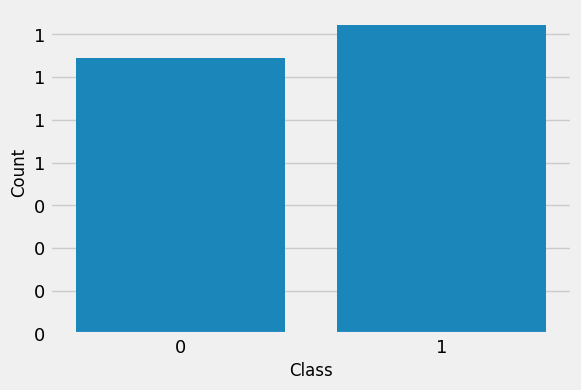

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as tkr
def func(x, pos):  # formatter function takes tick label and tick position
    s = '%d' % x
    groups = []
    while s and s[-1].isdigit():
        groups.append(s[-3:])
        s = s[:-3]
    return s + ','.join(reversed(groups))

y_format = tkr.FuncFormatter(func)  # make formatter
plt.figure(figsize=(6,4), dpi = 100)
p=sns.countplot(x='label',data= main_df )
p.yaxis.set_major_formatter(y_format)
p.tick_params(labelsize=13)
# plt.xticks(rotation = 50)
plt.xlabel("Class",fontsize=12)
plt.ylabel("Count",fontsize=12)
# plt.savefig('barchart.pdf',dpi=100,bbox_inches = 'tight')
plt.show()


In [ ]:
x=main_df.drop(['label'],axis=1)
y=main_df['label']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.18,random_state=0,shuffle=True)


In [ ]:
# df1.to_csv('/content/drive/MyDrive/childvggfeatures.csv',index=False)

## Result with spatial features

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=2)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
# kf = KFold(n_splits=10, shuffle=True)
# clf = KNeighborsClassifier(n_neighbors=2)
# score = cross_val_score(clf, result, y, cv= kf, scoring="accuracy")
# print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix

Training time: 0.0058786869049072266s
accuracy score 0.7286967418546366
error rate: 0.2713032581453634
              precision    recall  f1-score   support

           0       0.67      0.89      0.77       801
           1       0.84      0.57      0.68       795

    accuracy                           0.73      1596
   macro avg       0.76      0.73      0.72      1596
weighted avg       0.75      0.73      0.72      1596



array([[713,  88],
       [345, 450]])

In [ ]:
import lightgbm as lgb
print("LGB")
clf = lgb.LGBMClassifier(n_estimators=300)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
print('accuracy score',round(accuracy_score(Y_test,dtP3),2))
# kf = KFold(n_splits=10, shuffle=True)
# clf=RandomForestClassifier(max_depth=300, random_state=0,n_estimators=300)
# score = cross_val_score(clf, x, y, cv= kf, scoring="accuracy")
# print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix

LGB
[LightGBM] [Info] Number of positive: 3588, number of negative: 3679
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.154288 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153000
[LightGBM] [Info] Number of data points in the train set: 7267, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493739 -> initscore=-0.025046
[LightGBM] [Info] Start training from score -0.025046
Training time: 31.513624668121338s
error rate: 0.07769423558897248
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       801
           1       0.91      0.93      0.92       795

    accuracy                           0.92      1596
   macro avg       0.92      0.92      0.92      1596
weighted avg       0.92      0.92      0.92      1596

accuracy score 0.92


array([[732,  69],
       [ 55, 740]])

In [ ]:
from sklearn.linear_model import LogisticRegression
print("LR")
clf=LogisticRegression()
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
print('accuracy score',round(accuracy_score(Y_test,dtP3),2))
# kf = KFold(n_splits=10, shuffle=True)
# clf=SVC(kernel='linear')
# score = cross_val_score(clf, result, y, cv= kf, scoring="accuracy")
# print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix

LR
Training time: 0.13570213317871094s
error rate: 0.37092731829573933
              precision    recall  f1-score   support

           0       0.62      0.69      0.65       801
           1       0.64      0.57      0.60       795

    accuracy                           0.63      1596
   macro avg       0.63      0.63      0.63      1596
weighted avg       0.63      0.63      0.63      1596

accuracy score 0.63


array([[552, 249],
       [343, 452]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
print("RF")
clf=RandomForestClassifier(max_depth=300, random_state=0,n_estimators=300)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
print('accuracy score',round(accuracy_score(Y_test,dtP3),2))
# kf = KFold(n_splits=10, shuffle=True)
# clf=RandomForestClassifier(max_depth=300, random_state=0,n_estimators=300)
# score = cross_val_score(clf, result, y, cv= kf, scoring="accuracy")
# print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix

RF


## With Proposed

In [ ]:
import numpy as np
import lightgbm as lgb

RF=lgb.LGBMClassifier(n_estimators=60)
rfPre1=RF.fit(x, y).predict_proba(x)
rf=pd.DataFrame(rfPre1)

[LightGBM] [Info] Number of positive: 4383, number of negative: 4480
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.087588 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153000
[LightGBM] [Info] Number of data points in the train set: 8863, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494528 -> initscore=-0.021890
[LightGBM] [Info] Start training from score -0.021890


In [ ]:
# result = pd.concat([pl,rf], axis=1).reindex(pl.index)
# result=pd.read_csv('/content/drive/MyDrive/childfeaturefused.csv')
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(rf,y,test_size = 0.2,random_state=0,shuffle=True)
# result.columns=['1','2','3','4']

In [ ]:
# result.to_csv('/content/drive/MyDrive/childfeaturefused.csv',index=False)

In [ ]:
import lightgbm as lgb
print("LGB")
clf = lgb.LGBMClassifier(n_estimators=10)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
print('accuracy score',accuracy_score(Y_test,dtP3))
kf = KFold(n_splits=10, shuffle=True)
clf=lgb.LGBMClassifier(n_estimators=10)
score = cross_val_score(clf, rf, y, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix

LGB
[LightGBM] [Info] Number of positive: 3502, number of negative: 3588
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 7090, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493935 -> initscore=-0.024261
[LightGBM] [Info] Start training from score -0.024261
Training time: 0.01685500144958496s
error rate: 0.013536379018612488
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       892
           1       0.99      0.98      0.99       881

    accuracy                           0.99      1773
   macro avg       0.99      0.99      0.99      1773
weighted avg       0.99      0.99      0.99      1773

accuracy score 0.9864636209813875
[LightGBM] [Info] Number of positive: 3915, number of negative: 4061
[LightGB

array([[884,   8],
       [ 16, 865]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=2)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
kf = KFold(n_splits=10, shuffle=True)
clf = KNeighborsClassifier(n_neighbors=2)
score = cross_val_score(clf, rf, y, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix

Training time: 0.004827260971069336s
accuracy score 0.9751833051325437
error rate: 0.0248166948674563
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       892
           1       0.99      0.96      0.97       881

    accuracy                           0.98      1773
   macro avg       0.98      0.98      0.98      1773
weighted avg       0.98      0.98      0.98      1773

0.9780 accuracy with a standard deviation of 0.0069


array([[885,   7],
       [ 37, 844]])

In [ ]:
from sklearn.linear_model import LogisticRegression
print("LR")
clf=LogisticRegression()
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
print('accuracy score',round(accuracy_score(Y_test,dtP3),2))
kf = KFold(n_splits=10, shuffle=True)
clf=LogisticRegression()
score = cross_val_score(clf, rf, y, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix

LR
Training time: 0.008519649505615234s
error rate: 0.013536379018612488
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       892
           1       0.99      0.98      0.99       881

    accuracy                           0.99      1773
   macro avg       0.99      0.99      0.99      1773
weighted avg       0.99      0.99      0.99      1773

accuracy score 0.99
0.9858 accuracy with a standard deviation of 0.0040


array([[884,   8],
       [ 16, 865]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
print("RF")
clf=RandomForestClassifier(max_depth=300, random_state=0,n_estimators=300)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
print('accuracy score',accuracy_score(Y_test,dtP3))
kf = KFold(n_splits=10, shuffle=True)
clf=RandomForestClassifier(max_depth=300, random_state=0,n_estimators=300)
score = cross_val_score(clf, rf, y, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix

RF
Training time: 2.1053519248962402s
error rate: 0.022560631697687517
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       892
           1       0.99      0.97      0.98       881

    accuracy                           0.98      1773
   macro avg       0.98      0.98      0.98      1773
weighted avg       0.98      0.98      0.98      1773

accuracy score 0.9774393683023125
0.9780 accuracy with a standard deviation of 0.0075


array([[880,  12],
       [ 28, 853]])

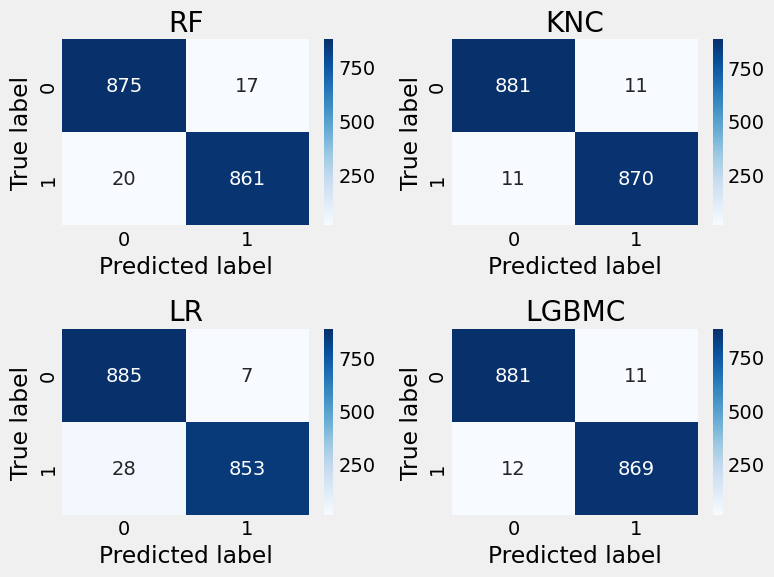

In [ ]:
array1=[[875,  17],
       [ 20, 861]]

array2=[[881,  11],
       [ 11, 870]]

array3=[[885,   7],
       [ 28, 853]]

array4=[[881,  11],
       [ 12, 869]]

# Create a figure with 8 subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,6),dpi=100)

# Create a list of confusion matrices and corresponding titles
cms =    [array1, array2, array3, array4]
titles = ['RF'  ,'KNC',   'LR',   'LGBMC' ]

# Plot each confusion matrix as a heatmap on a subplot
for ax, cm, title in zip(axes.flat, cms, titles):
    sns.heatmap(cm, annot=True, cmap='Blues', ax=ax,fmt='g')
    ax.set_title(title)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
# axes.flat[-1].axis('off')
# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.4)
fig.tight_layout()
# Display the figure
# plt.savefig('froncm.pdf')
plt.show()